In [1]:
import pandas as pd

linear_data = pd.read_csv('linear.csv')

linear_data.head()

,Unnamed: 0,x_1,x_2,y
0,0,-2.921542,-2.924093,0
1,1,0.136782,0.540402,1
2,2,2.747296,1.547237,1
3,3,-2.780707,-2.673131,0
4,4,2.030421,1.329452,1


In [2]:
features = linear_data[['x_1', 'x_2']]
labels = linear_data['y']

In [4]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [5]:
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)

svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)

,C,100
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
svm_degree_2 = SVC(kernel='poly', degree=2)
svm_degree_2.fit(features, labels)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
svm_gamma_01 = SVC(kernel='rbf', gamma=0.1)
svm_gamma_01.fit(features, labels)

svm_gamma_1 = SVC(kernel='rbf', gamma=1)
svm_gamma_1.fit(features, labels)

svm_gamma_10 = SVC(kernel='rbf', gamma=10)
svm_gamma_10.fit(features, labels)

svm_gamma_100 = SVC(kernel='rbf', gamma=100)
svm_gamma_100.fit(features, labels)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,100
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
# show that the distance between two lines w1x + b1 = 0 and w2x + b2 = 0 is given by 2 / root(w1^2 + w2^2)

import numpy as np
def distance_between_lines(w, b1, b2):
    return int(abs(b2 - b1) / np.sqrt(np.sum(w ** 2)))

distance_between_lines(np.array([3, 4]), -5, 5)

2

In [10]:
# XOR DATA

xor_dictlist = {
    'x_1': [0, 0, 1, 1],
    'x_2': [0, 1, 0, 1],
    'y':   [0, 1, 1, 0]
}

xor_data = pd.DataFrame(xor_dictlist)

In [12]:
X = xor_data[['x_1', 'x_2']]
y = xor_data['y']

In [13]:
from sklearn.svm import SVC

xor_svm_model = SVC(kernel='poly', degree=2)

xor_svm_model.fit(X, y)

,C,1.0
,kernel,'poly'
,degree,2
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
from sklearn.metrics import accuracy_score

predictions = xor_svm_model.predict(X)
accuracy = accuracy_score(y, predictions)

print(f'Accuracy on XOR data: {accuracy * 100}%')

Accuracy on XOR data: 100.0%


c:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


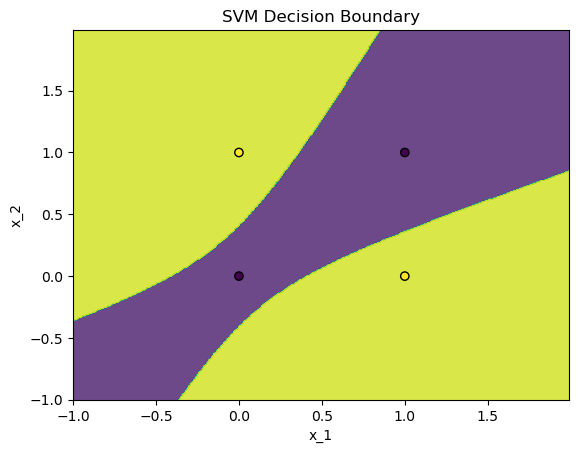

In [19]:
# visualizing svm results of classification
import matplotlib.pyplot as plt

def plot_svm_decision_boundary(model, features, labels):
    # Create a mesh grid
    x_min, x_max = features.iloc[:, 0].min() - 1, features.iloc[:, 0].max() + 1
    y_min, y_max = features.iloc[:, 1].min() - 1, features.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and training points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=labels, edgecolors='k', marker='o')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_svm_decision_boundary(xor_svm_model, X, y)

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error on XOR data: {mse}')

Mean Squared Error on XOR data: 0.0


In [26]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(n_estimators=6)
adaboost_classifier.fit(spam_dataset_features, spam_dataset_labels)
adaboost_classifier.score(spam_dataset_features, spam_dataset_labels)

0.7777777777777778

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=4, learning_rate=0.8, max_depth=3)
